# Let's start

### 1. Load all the required libraries 

Python has everything from data analysis, preprocessing, modelling to vizualization. 

In [51]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#supress warning
import warnings
warnings.filterwarnings('ignore')

In [64]:
print("\033[1;32;47m Hello  \n")

 Hello  



### 2. Load the actual csv dataset to pandas dataframe

In [59]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

In [58]:
Image(url='https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg')

In [5]:
url = "Iris.csv"
df = pandas.read_csv(url)

Check what's the structure of the data we have in the dataframe

In [6]:
df.shape

(150, 6)

Print the first 20 data points to have a glimpse of what we have 

In [7]:
print(df.head(20))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

Descriptive stats provided by python library for continous features without we do not want to do it manually.

And class distribution i.e total count of each class

In [8]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [9]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### 3. Feature vizualization

Vizualise feature to get an insight and to find correlation between features.

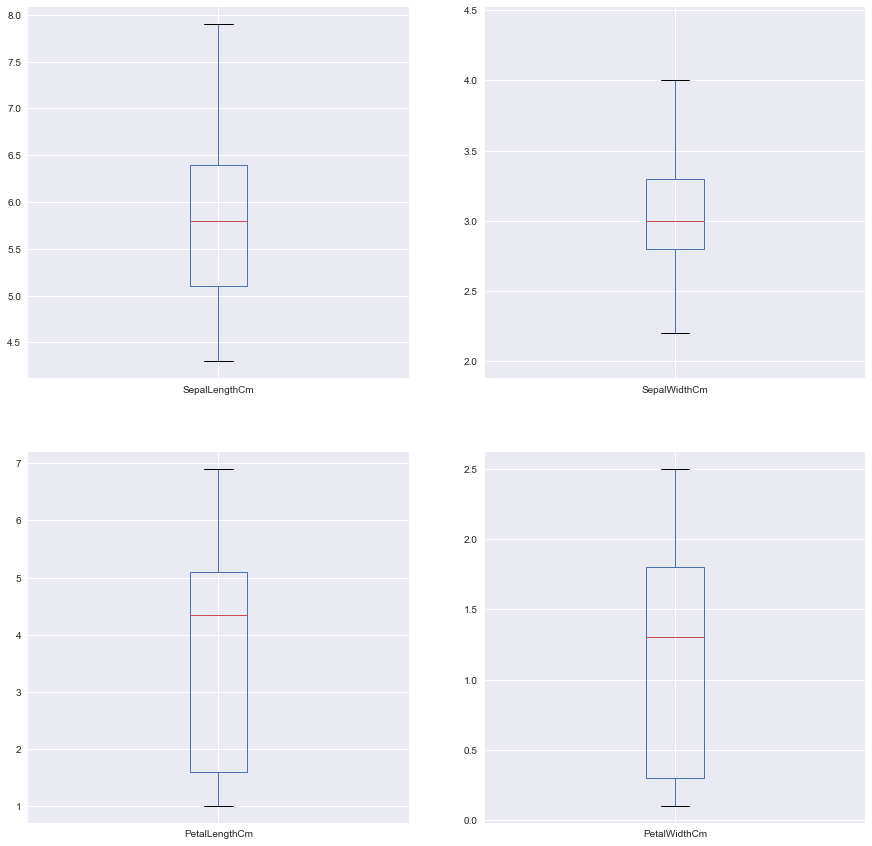

In [10]:
df.drop("Id", axis=1).plot(kind='box', figsize=(15,15), subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Swarm plot to visualize the attributes of the species of each class

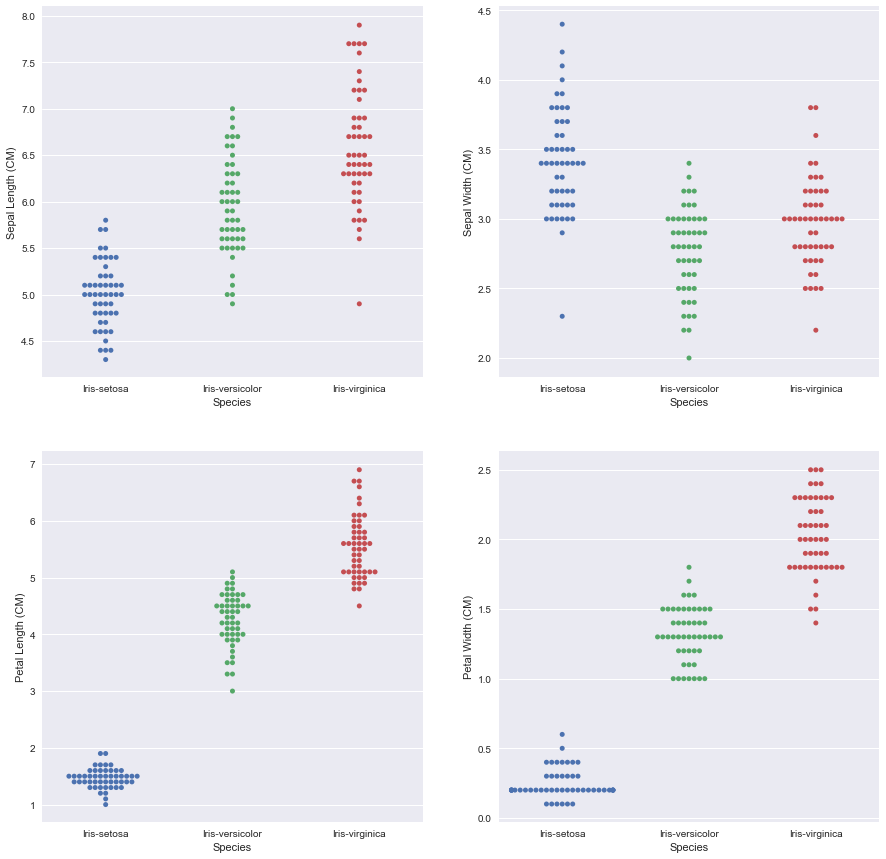

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
ax1 = sns.swarmplot(x='Species', y='SepalLengthCm', data=df.drop("Id", axis=1))
ax1.set_ylabel("Sepal Length (CM)")
plt.subplot(2,2,2)
ax2 = sns.swarmplot(x='Species', y='SepalWidthCm', data=df.drop("Id", axis=1))
ax2.set_ylabel("Sepal Width (CM)")
plt.subplot(2,2,3)
ax3 = sns.swarmplot(x='Species', y='PetalLengthCm', data=df.drop("Id", axis=1))
ax3.set_ylabel("Petal Length (CM)")
plt.subplot(2,2,4)
ax4 = sns.swarmplot(x='Species', y='PetalWidthCm', data=df.drop("Id", axis=1))
ax4.set_ylabel("Petal Width (CM)")
plt.show()

Density plot for each specious

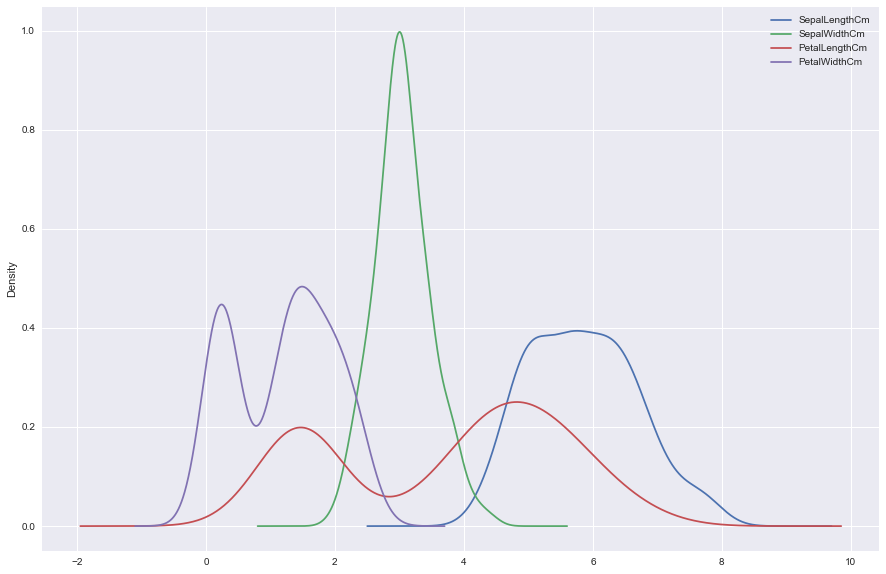

In [12]:
df.drop("Id", axis=1).plot(kind = "density", figsize=(15,10))
plt.show()

To check feature correlation we use scatter pair plot of all feature since we have countable feature of 4

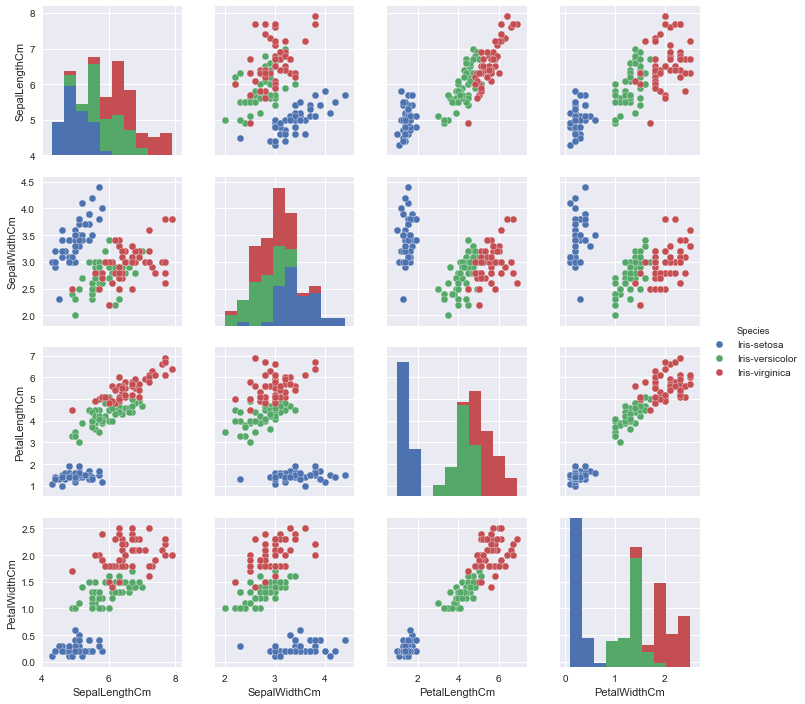

In [13]:
sns.pairplot(df.drop("Id", axis=1), hue = "Species")
plt.show()

One cool more sophisticated technique pandas has available is called Andrews Curves.

Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

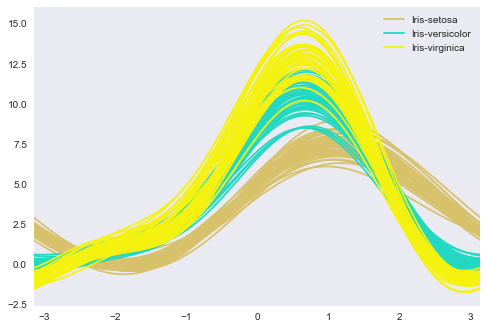

In [14]:
from pandas.tools.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")
plt.show()

Another multivariate visualization technique pandas has is parallel_coordinates.

Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample


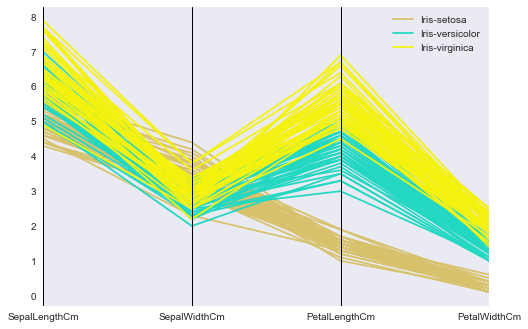

In [15]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.show()

A final multivariate visualization technique pandas has is radviz.

Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

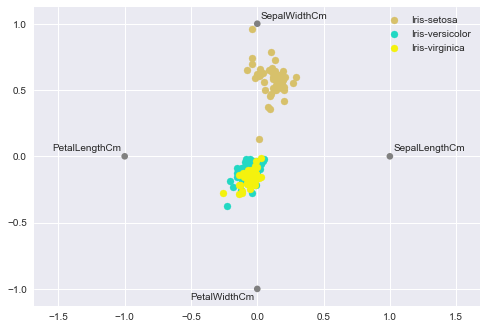

In [16]:
from pandas.tools.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")
plt.show()

### 3.9 Feature selection for training the algorithm

Here we use feature correlation to visualize the correlation between the features.

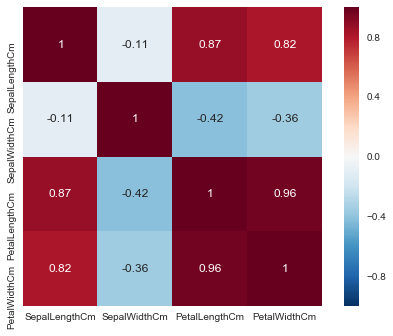

In [17]:
corr=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].corr()
sns.heatmap(corr, vmax=1, square=True,annot=True)
plt.show()

### 4. Split the data

Data is split into training and test set to train the model, we have used

In [18]:
array = df.values
X = array[:,1:5]
Y = array[:,5]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=7)

Scaling of the data which makes algorithms to crunch the data easier and tend to produce more generalized model.

In [19]:
#std_scale = preprocessing.StandardScaler().fit(X_train)
#X_train_scaled = std_scale.transform(X_train)
#X_test_scaled = std_scale.transform(X_test)

Algorithms evaluation

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier(random_state=7)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.954545 (0.060984)
KNN: 0.981818 (0.036364)
CART: 0.972727 (0.041660)
NB: 0.972727 (0.041660)
SVM: 0.990909 (0.027273)
MLP: 0.981818 (0.036364)


Simple plot to visualize the algorithm performance and compare algorithms

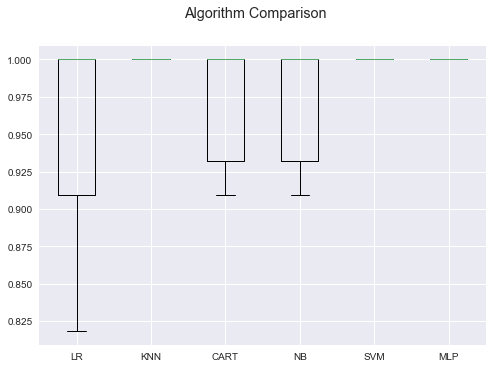

In [21]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 5. Model training using top three algorithms

5.1 Make predictions on test dataset using Support Vector Machine

In [22]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_predictions = svm.predict(X_test)

5.2 Using K Nearest Neighbour 

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_test)

5.3 Using a simple Multi Layer Perceptron Neural Network

In [24]:
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
mlp_prediction = mlp.predict(X_test)

5.4 Check the accuracy of the predictions made by the algorithm.

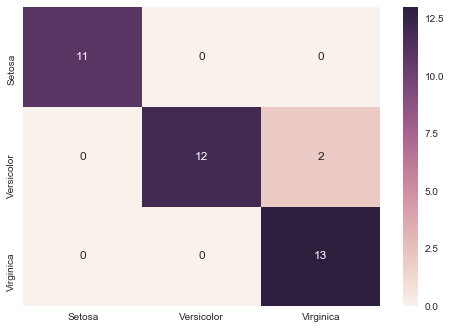

In [54]:
accuracy = accuracy_score(Y_test, svm_predictions)
confusion_mat = (confusion_matrix(Y_test, svm_predictions))
classification_rep = (classification_report(Y_test, svm_predictions))
label = ["Setosa","Versicolor","Virginica"]
sns.heatmap(confusion_mat, annot=True, xticklabels=label, yticklabels=label)
plt.show()

Value by value comparision. For easier interpretation.

In [97]:
for i,j in zip(X_test,Y_test):
    if (str(j) != str(svm.predict(i)[0])):
        print("\033[1;31;47m Actual value is: {:15} <---> Predicted value is: {:20} \n".format(str(j), str(svm.predict(i)[0])))
    else:
        print('\033[1;32;47m Actual value is: {:15} <---> Predicted value is: {:20} \n'.format(str(j), str(svm.predict(i)[0])))

 Actual value is: Iris-virginica  <---> Predicted value is: Iris-virginica       

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Actual value is: Iris-setosa     <---> Predicted value is: Iris-setosa          

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Actual value is: Iris-virginica  <---> Predicted value is: Iris-virginica       

 Actual value is: Iris-setosa     <---> Predicted value is: Iris-setosa          

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Actual value is: Iris-setosa     <---> Predicted value is: Iris-setosa          

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-virginica       

 Actual value is: Iris-versicolor <---> Predicted value is: Iris-versicolor      

 Act